# Combined Cycle Power Plant

This program is a regression problem based on the article "Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods" (Pınar Tüfekci, 2014). The dataset was obtained from UCI repository (https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant).

**Problem Description**



## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the Dataset

In [2]:
dataset = pd.read_csv('Combined_Cycle_Power_Plant.csv')

In [3]:
dataset.shape

(9568, 5)

In [4]:
dataset.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [5]:
dataset.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
dataset.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Pairplot 

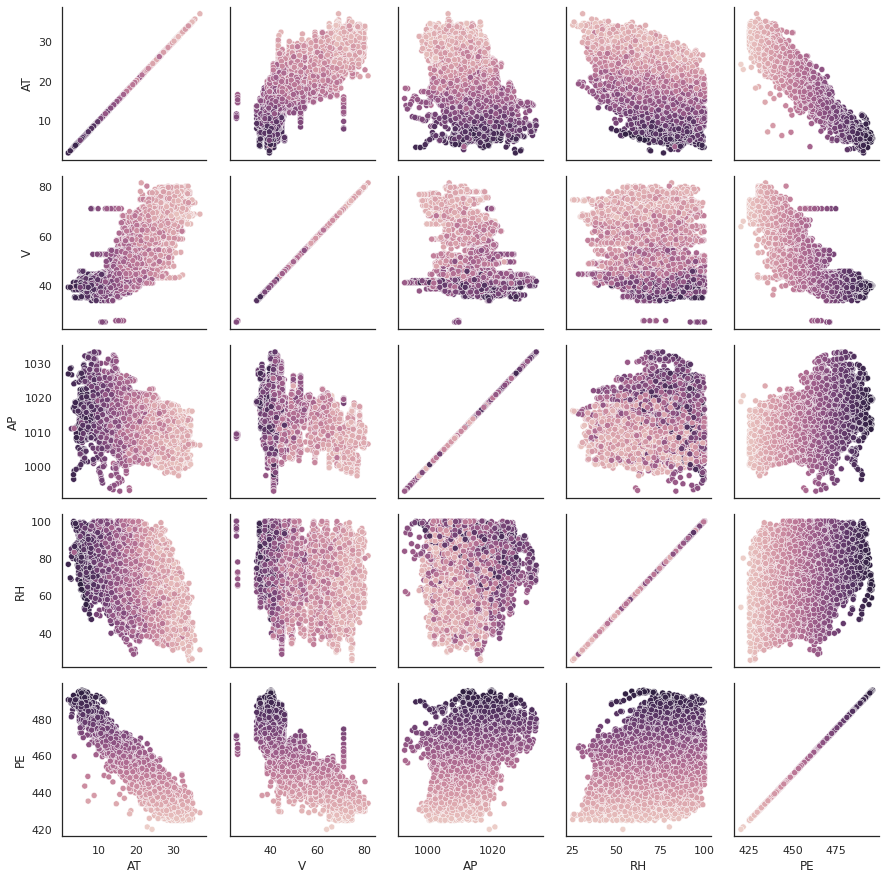

In [39]:
g = sns.PairGrid(data=dataset, vars=['AT', 'V', 'AP', 'RH','PE'], hue='PE')
g.map(sns.scatterplot,  color = '#3F5D7D')

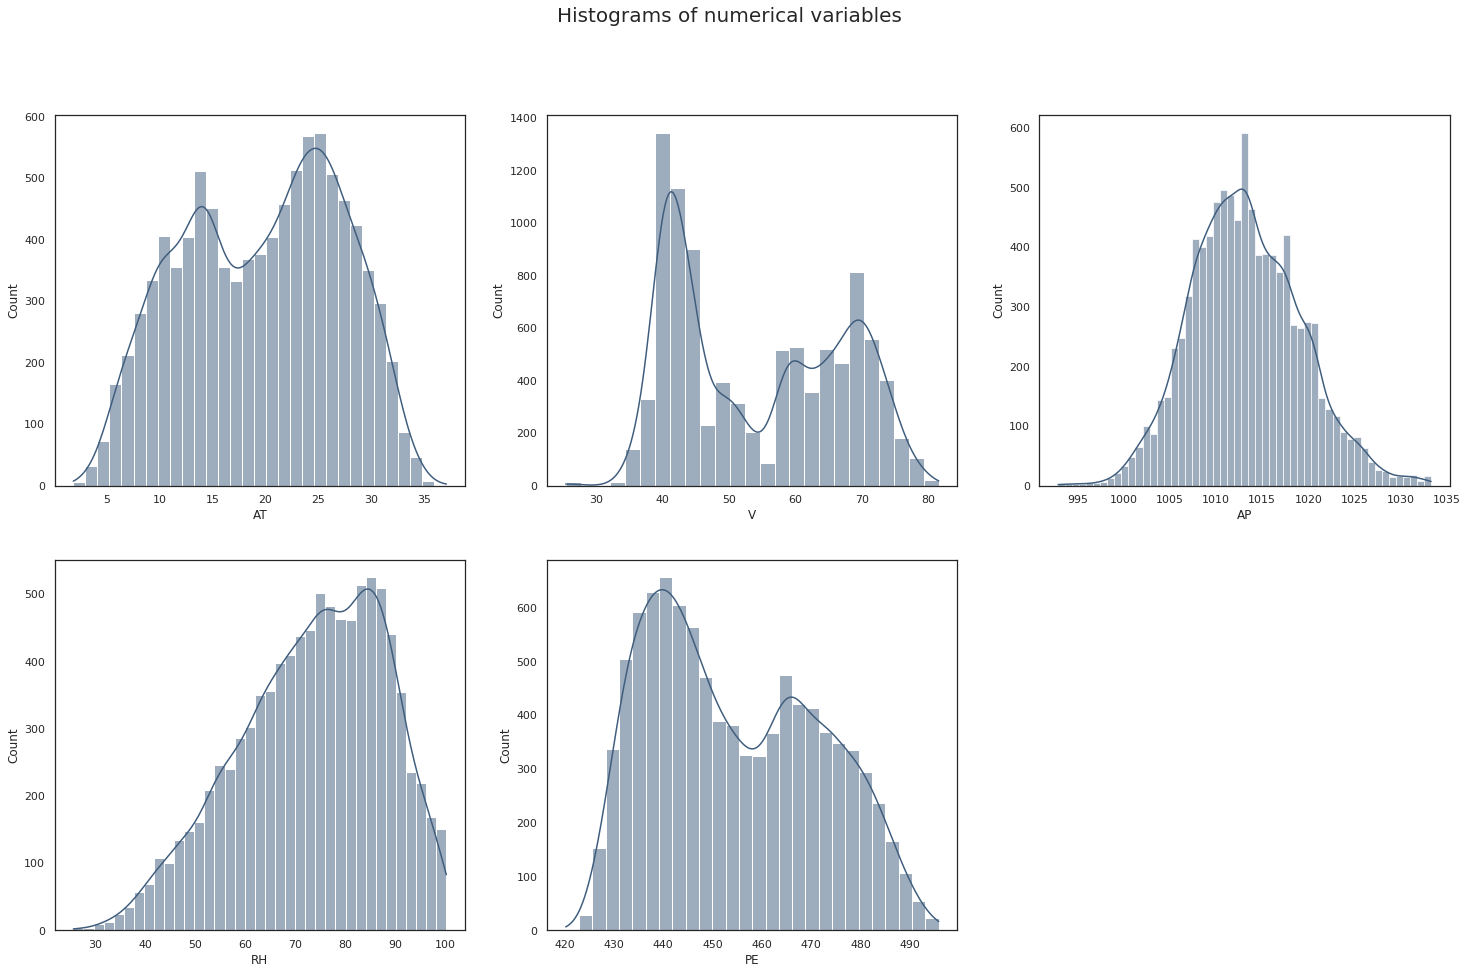

In [35]:
plt.figure(figsize=(25,15))
plt.suptitle('Histograms of numerical variables', fontsize = 20,)
for i in range(1, dataset.shape[1] + 1):
    plt.subplot(2, 3, i)
    f = plt.gca()
    #f.set_title(dataset.columns.values[i-1])
    sns.histplot(dataset.iloc[:, i-1], color = '#3F5D7D', kde= True)

<AxesSubplot:title={'center':'Correlation with reponse variable'}>

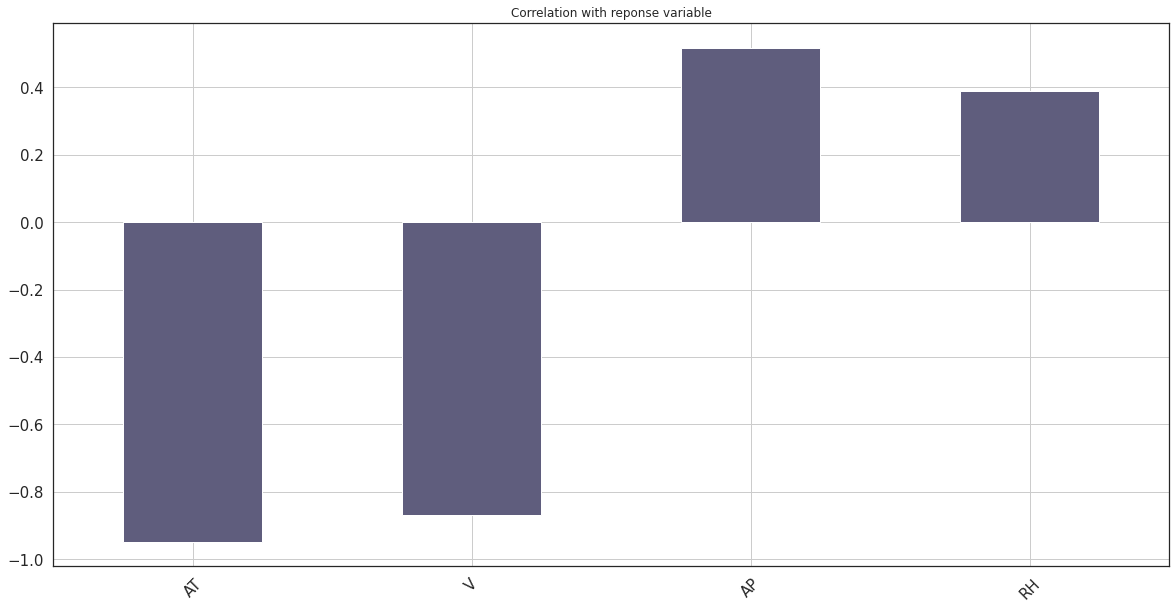

In [32]:
## Correlation with the response

dataset.drop(columns='PE').corrwith(dataset.PE).plot.bar(figsize = (20,10),
                                            title = 'Correlation with reponse variable',
                                            fontsize = 15, rot = 45, grid = True, color = '#5F5D7D')



<AxesSubplot:>

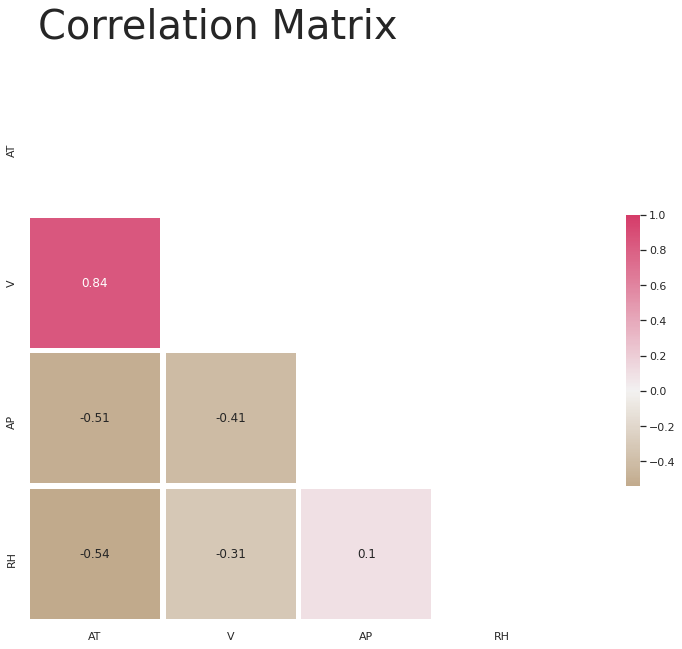

In [40]:
## Correlation between all variables

sns.set(style='white', font_scale= 1)
corr = dataset.drop(columns='PE').corr() # here we compute the correlation between numericals variables
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype= np.bool) # To generate a numpy array from correlation with true or false
mask[np.triu_indices_from(mask)] = True # To have the index of the upper triangle
# Setup the matplotlib figures
f, ax = plt.subplots(figsize = (20,10))
f.suptitle('Correlation Matrix', fontsize=40)
# Generate a custum diverging color map
cmap = sns.diverging_palette(50, 0, as_cmap=True)
# Draw the heatmap with the mask and the correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=1, center=0,
            square=True, linewidth=5, cbar_kws={'shrink': .5})